In [24]:
from pandas import Series
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s1 = Series([5, 6, 3, 8, 10, 6, 8, 1, 5, 7, 3, 4, 9, 4, 3, 3, 5])
s1

0      5
1      6
2      3
3      8
4     10
5      6
6      8
7      1
8      5
9      7
10     3
11     4
12     9
13     4
14     3
15     3
16     5
dtype: int64

In [3]:
print(s1.mean())
print(s1.median())
print(s1.mode())

5.294117647058823
5.0
0    3
dtype: int64


In [4]:
print(s1.max() - s1.min())

9


In [5]:
s2 = s1.value_counts()
s2

3     4
5     3
8     2
6     2
4     2
10    1
9     1
7     1
1     1
dtype: int64

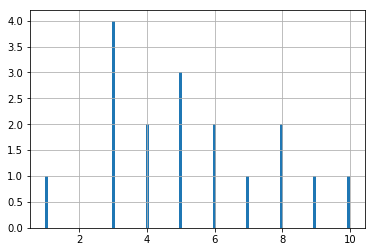

In [6]:
s1.hist(bins=100)
plt.show()

In [7]:
s3 = Series([12000, 12500, 15000, 13000, 12000, 20000, 12500, 80000, 13000, 13000, 15500, 16000, 95000])
s3

0     12000
1     12500
2     15000
3     13000
4     12000
5     20000
6     12500
7     80000
8     13000
9     13000
10    15500
11    16000
12    95000
dtype: int64

In [8]:
print(s3.mean())
print(s3.median())
print(s3.mode())

25346.153846153848
13000.0
0    13000
dtype: int64


In [9]:
print(s3.max() - s3.min())

83000


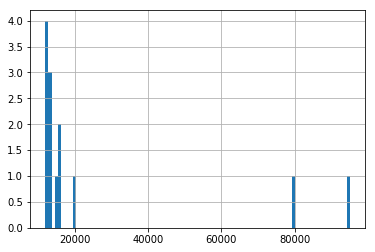

In [10]:
s3.hist(bins=100)
plt.show()

In [11]:
s4 = s3.sort_values()
s5 = s4.quantile([0.25, 0.50, 0.75])
print(s4)
print(s5)
q1, q3 = s5[0.25], s5[0.75]
iqr = q3 - q1
iqr

0     12000
4     12000
1     12500
6     12500
3     13000
8     13000
9     13000
2     15000
10    15500
11    16000
5     20000
7     80000
12    95000
dtype: int64
0.25    12500.0
0.50    13000.0
0.75    16000.0
dtype: float64


3500.0

In [ ]:
# Outlier treatment using IQR
# IQR of the data - Q1, Q3 - Q3 - Q1 = iqr
# 1.5iqr rule
# lower bound = Q1 - (1.5 iqr)
# upper bound = Q3 + (1.5 iqr)
# from the original data set take only those values that lie in between the lower bound and upper bound (including both of them)

In [13]:
s6 = s3.quantile([0.25, 0.75])
q1, q3 = s6[0.25], s6[0.75]
iqr = q3 - q1
lower = q1 - (1.5 * iqr)
upper = q3 + (1.5 * iqr)
print(lower, upper)

7250.0 21250.0


In [14]:
outlier_treatment_data = s3[(s3 >= lower) & (s3 <= upper)]
outlier_treatment_data

0     12000
1     12500
2     15000
3     13000
4     12000
5     20000
6     12500
8     13000
9     13000
10    15500
11    16000
dtype: int64

In [15]:
print(outlier_treatment_data.mean())
print(outlier_treatment_data.median())

14045.454545454546
13000.0


In [16]:
a = Series([5, 6, 3, 8, 10, 6, 8, 1, 5, 7, 3, 4, 9, 4, 3, 3, ])
a

0      5
1      6
2      3
3      8
4     10
5      6
6      8
7      1
8      5
9      7
10     3
11     4
12     9
13     4
14     3
15     3
dtype: int64

In [17]:
b = Series([5, 6, 4, 5.5, 6, 6, 4.5, 4, 5, 5, 6, 5.5, 6, 4.5, 4, 4, 5])
b

0     5.0
1     6.0
2     4.0
3     5.5
4     6.0
5     6.0
6     4.5
7     4.0
8     5.0
9     5.0
10    6.0
11    5.5
12    6.0
13    4.5
14    4.0
15    4.0
16    5.0
dtype: float64

In [20]:
print(a.mean())
print(b.mean())

5.3125
5.0588235294117645


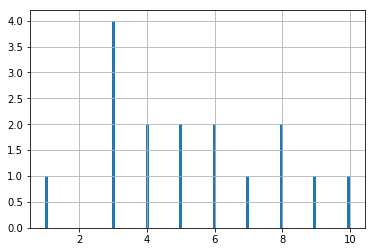

In [19]:
a.hist(bins=100)
plt.show()

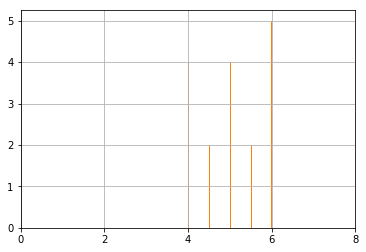

In [25]:
b.hist(bins=100)
plt.xticks(np.arange(0, 10, step=2))
plt.show()

In [26]:
# Sample standard deviation
# degree of freedom ( N - 1)
print(a.std())
print(b.std())

2.548692475237712
0.7882407813680822


In [27]:
# Population standard deviation
# degrees of freedom N - 0
print(a.std(ddof=0))
print(b.std(ddof=0))

2.4677608777999542
0.7647058823529411
